In [717]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd
import plotly.express as px
from scipy.signal import savgol_filter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.panel import PanelOLS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset
from sklearn.linear_model import TheilSenRegressor
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn.covariance import MinCovDet
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey


from scipy.stats import boxcox
from scipy.special import inv_boxcox
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [718]:
bank_names_mapping = mapping_dict = {
    'banco': 'banc sabadell',
    'my': 'myinvestor',
    'evo': 'evobanco',
    'caixa': 'caixabank',
    'abanca': 'abanca',
    'banc sabadell': 'banc sabadell',
    'bancosabadell': 'banc sabadell',
    'bancosantander': 'santander',
    'bancsabadell': 'banc sabadell',
    'sabadell': 'banc sabadell',
    'bank': 'bank',
    'bankinter': 'bankinter',
    'bbva': 'bbva',
    'caixabank': 'caixabank',
    'caixa_bank': 'caixabank',
    'date': 'date',
    'evobanco': 'evobanco',
    'evo_banco': 'evobanco',
    'imagin': 'imagin',
    'ing': 'ing',
    'ing-bank': 'ing',
    'ing_bank': 'ing',
    'kutxabank': 'kutxabank',
    'liberbank': 'liberbank',
    'myinvestor': 'myinvestor',
    'n26': 'n26',
    'n26.com': 'n26',
    None: None,  # handling nan (not a number)
    'openbank': 'openbank',
    'orangebank': 'orangebank',
    'pibank': 'pibank',
    'renaultbank': 'renaultbank',
    'revolut': 'revolut',
    'santander': 'santander',
    'value': 'value'
}

In [719]:
# categorical data 

cat_data = pd.read_csv('data/bank_comps.csv')

# create 2 groups based on the number of employees, assets

# Calculate median values
median_employee = cat_data['number_of_employee'].median()
median_assets = cat_data['assets_under_management'].median()

# Create new columns based on median comparison
cat_data['big_employees'] = np.where(cat_data['number_of_employee'] > median_employee, 1, 0)
cat_data['big_assets'] = np.where(cat_data['assets_under_management'] > median_assets, 1, 0)


# map bank names
cat_data['bank'] = cat_data['bank'].map(bank_names_mapping)

cat_data

,bank,number_of_employee,assets_under_management,number_of_branches,age,has_stores,founded_before_2000,web_traffic,big_employees,big_assets
0,abanca,5946,72148000000,690,13,1,0,1.357941e+06,0,0
1,santander,212764,226000000000,8518,167,1,1,NaN,1,1
2,banc sabadell,19316,201449000000,1594,143,1,1,NaN,1,1
3,bankinter,6138,83300000000,523,59,1,1,2.755435e+05,1,1
4,bbva,121486,110000000000,1800,167,1,1,9.920828e+05,1,1
5,caixabank,44863,81890000000,3922,120,1,1,NaN,1,1
6,evobanco,200,7350000000,80,12,0,0,1.696284e+05,0,0
7,imagin,118,81890000000,0,8,0,0,NaN,0,1
8,ing,60778,268000000000,1660,33,1,1,7.016930e+05,1,1
9,kutxabank,5343,25000000000,737,12,1,0,NaN,0,0


In [720]:
data = pd.read_csv('data/regression_clean_data_final_1.csv')
data.head()

,bank,date,web_traffic,cross_visitation,search_interest,rank,incentive,apr,mentions,app_installs,ppc_spend
0,abanca,2021-12-01,15202.983835,0.077994,7.75,4.0,150.0,0.0,1.0,43605.699637,1506.110026
1,abanca,2022-01-01,42183.913207,0.062500,7.80,4.0,150.0,0.0,1.0,43605.699637,1506.110026
2,abanca,2022-02-01,34498.153115,0.052288,7.25,4.0,150.0,0.0,2.0,48647.434439,32750.639361
3,abanca,2022-03-01,34546.319021,0.061503,6.75,4.0,150.0,0.0,2.0,26687.227413,15754.216964
4,abanca,2022-04-01,40508.288420,0.050222,6.75,4.0,300.0,0.0,2.0,4254.184995,6542.970638


In [721]:
# left join ['has_stores', 'founded_before_2000', 'big_employees', 'big_assets'] to data
data = data.merge(cat_data[['bank', 'has_stores', 'founded_before_2000', 'big_employees', 'big_assets']], on='bank', how='left')
data


,bank,date,web_traffic,cross_visitation,search_interest,rank,incentive,apr,mentions,app_installs,ppc_spend,has_stores,founded_before_2000,big_employees,big_assets
0,abanca,2021-12-01,15202.983835,0.077994,7.75,4.000000,150.0,0.0,1.0,43605.699637,1506.110026,1,0,0,0
1,abanca,2022-01-01,42183.913207,0.062500,7.80,4.000000,150.0,0.0,1.0,43605.699637,1506.110026,1,0,0,0
2,abanca,2022-02-01,34498.153115,0.052288,7.25,4.000000,150.0,0.0,2.0,48647.434439,32750.639361,1,0,0,0
3,abanca,2022-03-01,34546.319021,0.061503,6.75,4.000000,150.0,0.0,2.0,26687.227413,15754.216964,1,0,0,0
4,abanca,2022-04-01,40508.288420,0.050222,6.75,4.000000,300.0,0.0,2.0,4254.184995,6542.970638,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,santander,2023-08-01,34290.160425,0.118914,50.50,3.500000,150.0,0.0,1.0,94258.470775,23196.742521,1,1,1,1
271,santander,2023-09-01,40388.737821,0.125496,56.25,3.500000,400.0,0.0,3.0,115545.874406,18453.991325,1,1,1,1
272,santander,2023-10-01,36636.706633,0.126347,58.60,3.500000,400.0,0.0,4.0,105536.783263,18587.526350,1,1,1,1
273,santander,2023-11-01,35387.630139,0.121212,59.75,1.500000,400.0,0.0,3.0,87875.847509,30037.515265,1,1,1,1


In [722]:
# log scale web traffic
data['log_web_traffic'] = np.log(data['web_traffic'])

In [723]:
# log incentive, ppc, app install 
epsilon = 1e-6
data['incentive'] = data['incentive'] + epsilon
data['log_incentive'] = np.log(data['incentive'])
data['log_ppc'] = np.log(data['ppc_spend'])
data['log_app_installs'] = np.log(data['app_installs'])

### Pooled Data Regression

dummy cols casted

In [724]:
pooled_data = pd.get_dummies(data, columns=['bank'], drop_first=True)


# cast the dummy columns to int 
pooled_data[[ 'bank_banc sabadell', 'bank_bankinter',
       'bank_bbva', 'bank_evobanco', 'bank_ing', 'bank_myinvestor', 'bank_n26',
       'bank_openbank', 'bank_revolut', 'bank_santander','has_stores','founded_before_2000', 'big_employees', 'big_assets']] = pooled_data[[ 'bank_banc sabadell', 'bank_bankinter',
       'bank_bbva', 'bank_evobanco', 'bank_ing', 'bank_myinvestor', 'bank_n26',
       'bank_openbank', 'bank_revolut', 'bank_santander','has_stores','founded_before_2000', 'big_employees', 'big_assets']].astype(int)

In [725]:
pooled_data['date'] = pd.to_datetime(pooled_data['date'])

# create a dummy column for january 
pooled_data['month_1'] = np.where(pooled_data['date'].dt.month == 1, 1, 0)

In [726]:
# create a web traffic lag variable
pooled_data['log_web_traffic_lag'] = pooled_data['log_web_traffic'].shift(1)
pooled_data['log_web_traffic_lag_2'] = pooled_data['log_web_traffic'].shift(2)
pooled_data['log_web_traffic_lag_3'] = pooled_data['log_web_traffic'].shift(3)
pooled_data['log_web_traffic_lag_4'] = pooled_data['log_web_traffic'].shift(4)


In [727]:
# scale all of the variables with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pooled_data[['month_1','cross_visitation', 'search_interest', 'apr', 'mentions', 'log_web_traffic_lag', 'log_web_traffic','log_incentive', 'log_app_installs', 'log_ppc']] = scaler.fit_transform(pooled_data[['month_1','cross_visitation', 'search_interest', 'apr', 'mentions', 'log_web_traffic_lag', 'log_web_traffic', 'log_incentive', 'log_app_installs', 'log_ppc' ]])


In [728]:
pooled_data.log_web_traffic_lag = pooled_data.log_web_traffic_lag.bfill()

In [729]:
y = pooled_data['log_web_traffic']

ind_vars = ['log_web_traffic_lag', 'cross_visitation', 'search_interest', 'apr', 'mentions', 'log_incentive', 'log_ppc', 'month_1']

X = pooled_data[ind_vars]

X = sm.add_constant(X)

# Create and fit the fixed effects model
model = sm.OLS(y, X).fit(covariance_type='HC3')
pooled_regression_summary = model.summary()
print(pooled_regression_summary)

                            OLS Regression Results                            
Dep. Variable:        log_web_traffic   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           4.85e-88
Time:                        16:10:26   Log-Likelihood:                -169.69
No. Observations:                 275   AIC:                             357.4
Df Residuals:                     266   BIC:                             389.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0001    

In [730]:
robust_cov = model.get_robustcov_results(cov_type='HC3')
print(robust_cov.summary())

                            OLS Regression Results                            
Dep. Variable:        log_web_traffic   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.64e-95
Time:                        16:10:26   Log-Likelihood:                -169.69
No. Observations:                 275   AIC:                             357.4
Df Residuals:                     266   BIC:                             389.9
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0001    

#### Multicollinearity check

In [731]:

# Assuming df is your DataFrame and it contains the independent variables
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0                const  1.000000
1  log_web_traffic_lag  2.288651
2     cross_visitation  2.162500
3      search_interest  1.690133
4                  apr  1.222446
5             mentions  1.171795
6        log_incentive  1.577389
7              log_ppc  1.597152
8              month_1  1.025790


Variance inflation factor is used to check multicollinearity. It does this by checking how much the variance of a coefficient increases when your predictors are correlated. It does this by regressing each coefficient as the dependent variable and is a measure of each subsequent regression's R^2. If the VIF is greater than 10, you have high multicollinearity. All VIF are less than 10 and the highest is 2.5, indicating no multicollinearity.

#### Heteroskedasticity check

In [732]:
_, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan p-value:', pval)
print('Breusch-Pagan F-statistic p-value:', f_pval)

Breusch-Pagan p-value: 0.28454623684502794
Breusch-Pagan F-statistic p-value: 0.2875555327783149


Breusch-Pagan Test Interpretation

Breusch-Pagan p-value: 0.28454623684502794
Breusch-Pagan F-statistic p-value: 0.2875555327783149

Null Hypothesis (H0): The null hypothesis for the Breusch-Pagan test is that there is homoscedasticity, meaning the variance of the errors is constant across observations.

Alternative Hypothesis (H1): The alternative hypothesis is that there is heteroscedasticity, meaning the variance of the errors varies across observations.

Both p-values are greater than 0.05. Meaning we fail to reject the null hypothesis of homoscedasticity. There is no significant evidence of heteroscedasticity in the regression model based on these p-values.

Breush-pagan is calculated as a measure of the squared residuals and a regression of the independent variables. 

#### Autocorrelation Check

In [733]:

dw_stat = durbin_watson(model.resid)
print('Durbin-Watson statistic:', dw_stat)


Durbin-Watson statistic: 2.1072459723346864


The Durbin-Watson statistic ranges from 0 to 4. A value of 2 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from 2 to 4 indicate negative autocorrelation. The Durbin-Watson statistic is 2.1, indicating no autocorrelation. 

The Durbin-Watson statistic is calculated as the sum of the squared differences between consecutive residuals divided by the sum of the squared residuals. This gives an indication of the correlation between residuals.

#### Model Specification Check

In [734]:

reset_test = linear_reset(model, use_f=True)
print('Ramsey RESET test p-value:', reset_test.pvalue)

Ramsey RESET test p-value: 0.051228014188020615


The p-value of the Ramsey RESET test is a measure of the probability that the observed test statistic would occur under the null hypothesis, which states that there are no omitted variables or incorrect functional forms.

Key Points:
Null Hypothesis (H0): The model has no specification error (i.e., it is correctly specified).
Alternative Hypothesis (H1): The model has specification errors (i.e., it is misspecified).

The Ramsey RESET test introduces higher-order terms of the fitted values (i.e., predictions from the original model) into the regression equation to detect misspecification errors such as omitted variables or incorrect functional forms.

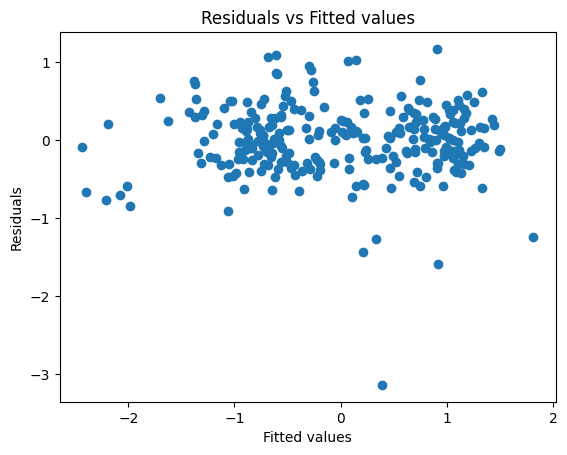

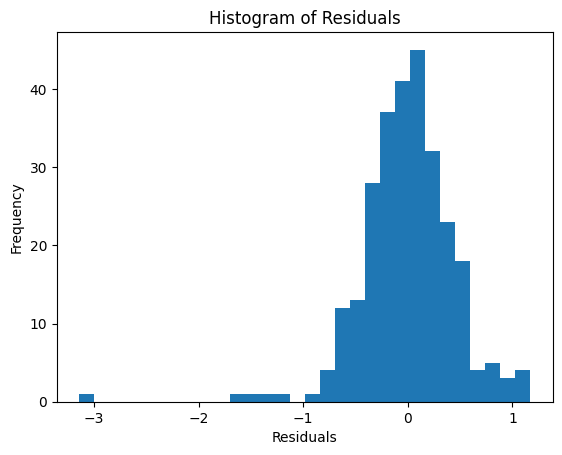

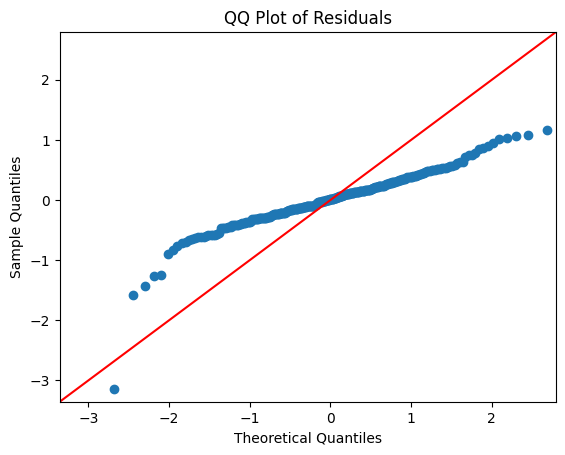

In [735]:
# Plot residuals to check if assumptions are better met
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Histogram of residuals
plt.hist(model.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# QQ plot of residuals
sm.qqplot(model.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

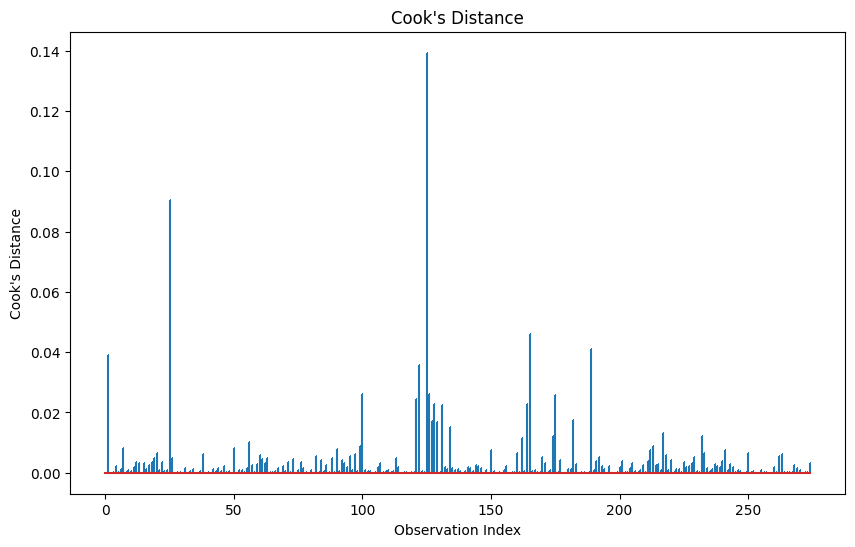

In [736]:

influence = model.get_influence()
(c, p) = influence.cooks_distance

# Plot Cook's distance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s Distance')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.show()

### Box Cox Transformation

In [737]:
y_positive = y + 1 - y.min()  # Adjusting y to be strictly positive
box_cox_lambda = stats.boxcox_normmax(y_positive, method='mle')

In [738]:

# Apply the Box-Cox transformation using the optimal lambda
y_box_cox = stats.boxcox(y_positive, lmbda=box_cox_lambda)

# Update the DataFrame with the transformed variable
pooled_data['log_web_traffic_transformed'] = y_box_cox

# Fit the model using the transformed dependent variable
box_cox_model = sm.OLS(y_box_cox, X).fit()

# Check the summary of the model
print(box_cox_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           9.58e-90
Time:                        16:10:26   Log-Likelihood:                -328.00
No. Observations:                 275   AIC:                             674.0
Df Residuals:                     266   BIC:                             706.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.6321    

In [739]:
robust_cov = box_cox_model.get_robustcov_results(cov_type='HC3')
print(robust_cov.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.78e-100
Time:                        16:10:26   Log-Likelihood:                -328.00
No. Observations:                 275   AIC:                             674.0
Df Residuals:                     266   BIC:                             706.5
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.6321    

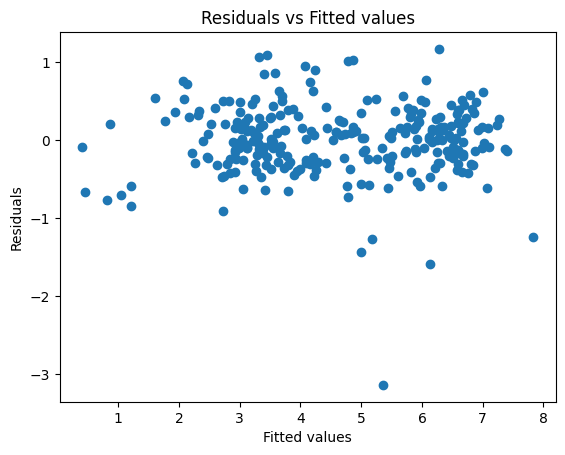

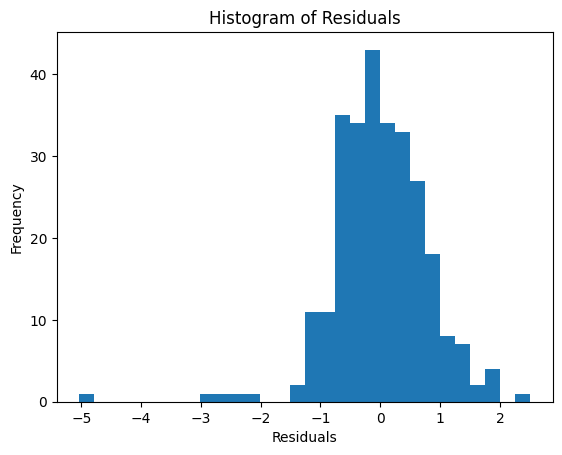

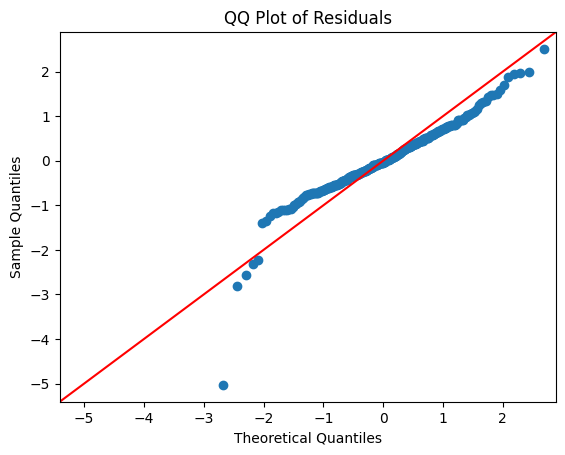

In [740]:
# Plot residuals to check if assumptions are better met
plt.scatter(box_cox_model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Histogram of residuals
plt.hist(box_cox_model.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# QQ plot of residuals
sm.qqplot(box_cox_model.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

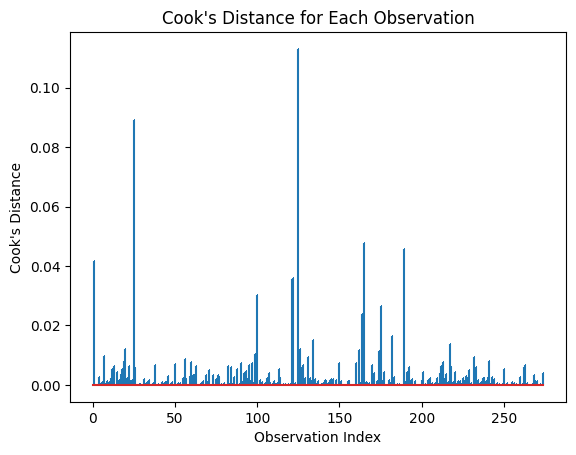

Influential points (index): [  1  25 100 121 122 125 134 164 165 175 182 189]


In [741]:
# Calculate Cook's Distance
influence = box_cox_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.show()

# Identify influential points
threshold = 4 / len(X)
influential_points = np.where(cooks_d > threshold)[0]
print(f"Influential points (index): {influential_points}")

In [742]:
robust_model = sm.RLM(y_box_cox, X, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

print(robust_results.summary2())

# print r squared
print('R-squared:', robust_model.score)



# Fit M-estimator (Theil-Sen) robust regression
# theil_sen = TheilSenRegressor(random_state=42)
# theil_sen.fit(X, y)
# print("Coefficients:", theil_sen.coef_)


                    Results: Robust linear model
Model:                  RLM                 Df Residuals:    266    
Dependent Variable:     y                   Norm:            HuberT 
Date:                   2024-07-01 16:10    Scale Est.:      mad    
No. Observations:       275                 Cov. Type:       H1     
Df Model:               8                   Scale:           0.67997
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                4.6420   0.0412 112.7045 0.0000  4.5612  4.7227
log_web_traffic_lag  1.3966   0.0624  22.3739 0.0000  1.2743  1.5190
cross_visitation     0.0622   0.0606   1.0272 0.3043 -0.0565  0.1809
search_interest      0.1081   0.0535   2.0196 0.0434  0.0032  0.2131
apr                 -0.1097   0.0455  -2.4091 0.0160 -0.1990 -0.0205
mentions            -0.0575   0.0446  -1.2895 0.1972 -

In [743]:
# Get the predicted values
y_pred = robust_results.predict(X)

# Calculate residuals
residuals = y_box_cox - y_pred

# Calculate total sum of squares (TSS) and residual sum of squares (RSS)
TSS = np.sum((y_box_cox - np.mean(y_box_cox))**2)
RSS = np.sum(residuals**2)

# Number of observations and predictors
n = len(y_box_cox)
p = X.shape[1]

# Calculate Adjusted R-squared
R2 = 1 - (RSS / TSS)
adj_R2 = 1 - (RSS / (n - p - 1) / (TSS / (n - 1)))

print("R-squared:", R2)
print("Adjusted R-squared:", adj_R2)

R-squared: 0.8018133350859051
Adjusted R-squared: 0.7950824672208981


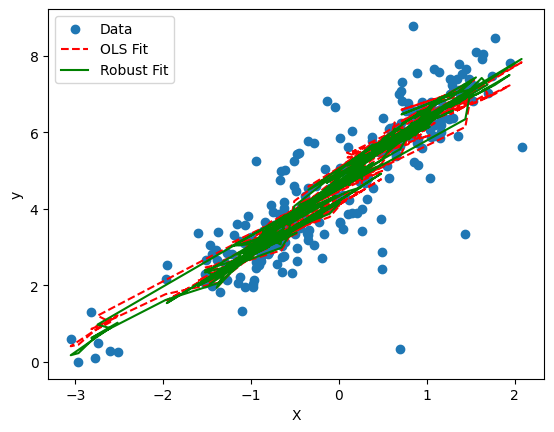

In [744]:

# Plotting the results
plt.scatter(X.iloc[:, 1], y_box_cox, label='Data')
plt.plot(X.iloc[:, 1], box_cox_model.fittedvalues, 'r--', label='OLS Fit')
plt.plot(X.iloc[:, 1], robust_results.fittedvalues, 'g-', label='Robust Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

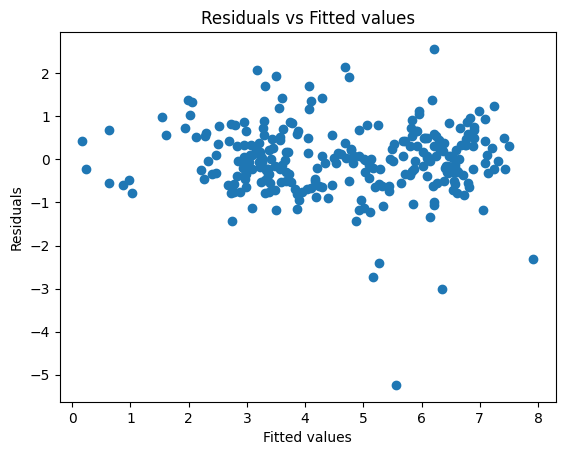

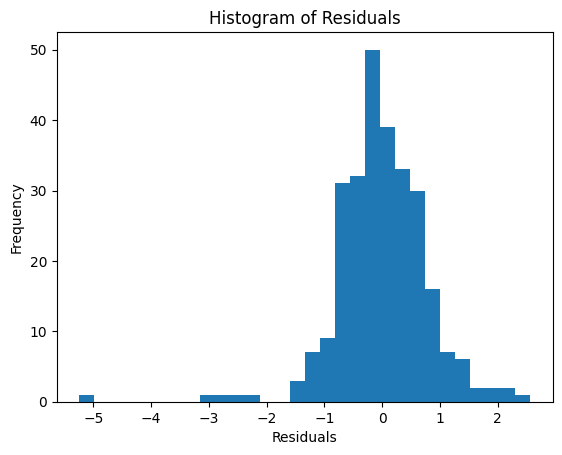

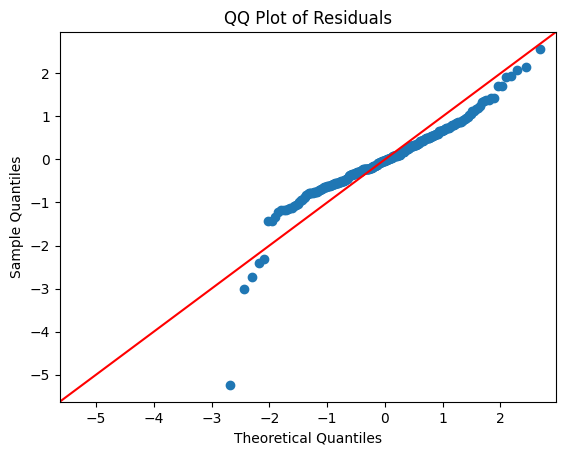

In [745]:
# Plot residuals to check if assumptions are better met
plt.scatter(robust_results.fittedvalues, robust_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Histogram of residuals
plt.hist(robust_results.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# QQ plot of residuals
sm.qqplot(robust_results.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

In [746]:
# Perform outlier test
residuals = robust_results.resid

std_deviation = residuals.std()
outliers = residuals[abs(residuals) > 3 * std_deviation]  # Adjust as needed
outliers


25    -3.007498
121    2.567543
125   -5.238796
175   -2.739763
dtype: float64

In [747]:
# get fitted values 
pooled_data['fitted_values_robust'] = robust_results.fittedvalues

pooled_data['fitted_values_box_cox'] = box_cox_model.fittedvalues


In [748]:
data.loc[[25, 121, 125, 175]]

,bank,date,web_traffic,cross_visitation,search_interest,rank,incentive,apr,mentions,app_installs,ppc_spend,has_stores,founded_before_2000,big_employees,big_assets,log_web_traffic,log_incentive,log_ppc,log_app_installs
25,n26,2021-12-01,8723.148705,0.067204,1.00,7.000000,300.000001,2.0,2.0,7939.828992,781.026447,0,0,0,0,9.073736,5.703782,6.660609,8.979647
121,bbva,2023-09-01,102540.477521,0.192308,56.75,5.000000,0.000001,0.0,2.0,104802.543011,57026.449019,1,1,1,1,11.538013,-13.815511,10.951270,11.559833
125,revolut,2021-12-01,1343.418328,0.071006,7.75,3.596774,0.000001,0.0,0.0,118468.753881,33013.718587,0,0,1,0,7.202973,-13.815511,10.404678,11.682405
175,myinvestor,2021-12-01,5319.608623,0.068323,7.00,5.000000,0.000001,0.0,2.0,21063.783047,21353.566383,0,0,0,0,8.579155,-13.815511,9.968974,9.955310


In [749]:
banks_to_plot = data.loc[[25, 121, 125, 175]]['bank']

# for each bank, plot the fitted values 


# Loop through each bank
for bank in banks_to_plot:
    # Filter data for the current bank
    bank_data = data[data['bank'] == bank]
    
    # Extract actual and fitted values
    bank_web_traffic = bank_data['log_web_traffic']
    bank_fitted_values = pooled_data.loc[bank_web_traffic.index, 'fitted_values_robust']  # Replace with actual column name
    bank_fitted_value_2 = pooled_data.loc[bank_web_traffic.index, 'fitted_values_box_cox']
    
    fig = go.Figure()

    # Add actual values trace to the figure
    fig.add_trace(go.Scatter(x=bank_data['date'], y=bank_web_traffic, mode='lines', name=f'Actual - {bank}'))
    
    # Add fitted values trace to the figure with secondary y-axis
    fig.add_trace(go.Scatter(x=bank_data['date'], y=bank_fitted_values, mode='lines', name=f'Robust Fitted - {bank}', yaxis='y2'))

    fig.add_trace(go.Scatter(x=bank_data['date'], y=bank_fitted_value_2, mode='lines', name=f'Box Cox Fitted - {bank}', yaxis='y2'))
    
    # Update layout for the primary and secondary y-axes
    fig.update_layout(
        yaxis=dict(title='Actual Values', side='left', showgrid=False),
        yaxis2=dict(title='Fitted Values', overlaying='y', side='right', showgrid=False)
    )
    
    # Update figure title
    fig.update_layout(title='Actual vs Fitted Values - ' + bank)
    
    # Show the figure
    fig.show()

### Splitting banks by relevant feature

big banks only

In [750]:
def get_model_stats(model): 
    # Assuming df is your DataFrame and it contains the independent variables
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print('VIF Multicollinearity indicators: ')
    print(vif_data)

    _, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
    print('Breusch-Pagan p-value:', pval)
    print('Breusch-Pagan F-statistic p-value:', f_pval)
    # print interpretation of the p-value
    if pval < 0.05:
        print('heteroskedasticity is present. Model is not appropriate for the data.')
    else:  
        print('Fheteroskedasticity is not present. Model is appropriate for the data.')

    dw_stat = durbin_watson(model.resid)
    print('Durbin-Watson statistic:', dw_stat)
    # print interpretation of the durbin watson statistic
    if dw_stat < 1:
        print('Positive autocorrelation is present. Model is not appropriate for the data.')
    elif dw_stat > 3:
        print('Negative autocorrelation is present. Model is not appropriate for the data.')
    else:
        print('No autocorrelation is present. Model is appropriate for the data.')

    reset_test = linear_reset(model, use_f=True)
    print('Ramsey RESET test p-value:', reset_test.pvalue)
    # print interpretation of the p-value

    if reset_test.pvalue < 0.05:
        print('The model is not correctly specified. Model is not appropriate for the data.')
    else:
        print('The model is correctly specified. Model is appropriate for the data.')
        
    # Perform the Breusch-Godfrey test
    bg_test = acorr_breusch_godfrey(model, nlags=4)  # Test for up to 4 lags

    # Display the results
    print('Breusch-Godfrey test statistic:', bg_test[0])
    print('p-value:', bg_test[1])
    print('F-statistic:', bg_test[2])
    print('F p-value:', bg_test[3])
    # print interpretation of the p-value
    if bg_test[1] < 0.05:
        print('The model is not correctly specified. Model is not appropriate for the data.')
    else:
        print('The model is correctly specified. Model is appropriate for the data.')

def get_model_stats_robust(robust_cov):
    _, pval, _, f_pval = het_breuschpagan(robust_cov.resid, robust_cov.model.exog)

    print('Breusch-Pagan p-value:', pval)
    print('Breusch-Pagan F-statistic p-value:', f_pval)

    if pval < 0.05:
        print('Heteroskedasticity is present. Model is not appropriate for the data.')
    else:
        print('Heteroskedasticity is not present. Model is appropriate for the data.')

    # Perform Durbin-Watson Test for Autocorrelation
    dw_stat = durbin_watson(robust_cov.resid)

    print('Durbin-Watson statistic:', dw_stat)

    if dw_stat < 1:
        print('Positive autocorrelation is present. Model is not appropriate for the data.')
    elif dw_stat > 3:
        print('Negative autocorrelation is present. Model is not appropriate for the data.')
    else:
        print('No autocorrelation is present. Model is appropriate for the data.')

    # Perform Ramsey RESET Test for Specification Error
    reset_test = reset_ramsey(robust_cov)

    print('Ramsey RESET test p-value:', reset_test.pvalue)

    if reset_test.pvalue < 0.05:
        print('The model is not correctly specified. Model is not appropriate for the data.')
    else:
        print('The model is correctly specified. Model is appropriate for the data.')

    # Perform Breusch-Godfrey Test for Serial Correlation
    bg_test = acorr_breusch_godfrey(robust_cov, nlags=4)  # Test for up to 4 lags

    print('Breusch-Godfrey test statistic:', bg_test[0])
    print('p-value:', bg_test[1])
    print('F-statistic:', bg_test[2])
    print('F p-value:', bg_test[3])

    if bg_test[1] < 0.05:
        print('The model is not correctly specified. Model is not appropriate for the data.')
    else:
        print('The model is correctly specified. Model is appropriate for the data.')


def get_model_graphs(model):
    # Plot residuals to check if assumptions are better met
    plt.scatter(model.fittedvalues, model.resid)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted values')
    plt.show()

    # Histogram of residuals
    plt.hist(model.resid, bins=30)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

    # QQ plot of residuals
    sm.qqplot(model.resid, line='45')
    plt.title('QQ Plot of Residuals')
    plt.show()


    influence = model.get_influence()
    (c, p) = influence.cooks_distance

    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    plt.title('Cook\'s Distance')
    plt.xlabel('Observation Index')
    plt.ylabel('Cook\'s Distance')
    plt.show()

# set up all of the interaction terms for further analysis

In [751]:
ind_vars = ['log_web_traffic_lag',
 'cross_visitation',
 'search_interest',
 'apr',
 'mentions',
 'log_incentive',
 'log_ppc',
 'month_1']

In [752]:

big_v_small_cols =  ['has_stores','founded_before_2000', 'big_employees', 'big_assets']
interaction_terms = []

for col1 in big_v_small_cols: 
       reg = []
       for col2 in ind_vars:
              pooled_data[col1 + ' x ' + col2] = pooled_data[col1] * pooled_data[col2]
              reg.append(col1 + ' x ' + col2)
       interaction_terms.append(reg)

pooled_data = pooled_data.fillna(0)

In [753]:
big_v_small_cols[0]

'has_stores'

In [754]:

all_values = {}

index = 0
for term in interaction_terms:
    # Define the dependent and independent variables
    y = pooled_data['log_web_traffic_transformed']

    X = pooled_data[term]

    X = sm.add_constant(X)

    # Create and fit the fixed effects model
    model = sm.OLS(y, X).fit()
    pooled_regression_summary = model.summary()
    # print(pooled_regression_summary)
    robust_cov = model.get_robustcov_results(cov_type='HC3')
    print(robust_cov.summary())

    # create a dictionary of p values and variable names 
    all_values[big_v_small_cols[index]] = robust_cov.pvalues

    index += 1



                                 OLS Regression Results                                
Dep. Variable:     log_web_traffic_transformed   R-squared:                       0.604
Model:                                     OLS   Adj. R-squared:                  0.592
Method:                          Least Squares   F-statistic:                     57.66
Date:                         Mon, 01 Jul 2024   Prob (F-statistic):           8.53e-54
Time:                                 16:10:27   Log-Likelihood:                -425.39
No. Observations:                          275   AIC:                             868.8
Df Residuals:                              266   BIC:                             901.3
Df Model:                                    8                                         
Covariance Type:                           HC3                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

errors are not normally distributed which indicates poor model fit

has stores
    apr
    lag

before 2000
    price per customer

big employees
    search interest

big assets
    apr
    ppc
    incentives


small banks now

In [755]:

big_v_small_cols =  ['has_stores','founded_before_2000', 'big_employees', 'big_assets']
big_v_small_cols_invert =  ['no_stores','founded_after_2000', 'small_employees', 'small_assets']
pooled_data_inverted = pooled_data.copy()
interaction_terms_invert = []

index = 0
for col1 in big_v_small_cols: 
       reg = []
       # invert 0 to 1 and 1 to 0 in col1 
       pooled_data_inverted[col1] = pooled_data_inverted[col1].apply(lambda x: 1 if x == 0 else 0)
       for col2 in ind_vars:
              pooled_data_inverted[big_v_small_cols_invert[index] + ' x ' + col2] = pooled_data_inverted[col1] * pooled_data_inverted[col2]
              reg.append(big_v_small_cols_invert[index] + ' x ' + col2)
       interaction_terms_invert.append(reg)
       index += 1

pooled_data_inverted = pooled_data_inverted.fillna(0)

In [756]:

for index in range(0, len(interaction_terms_invert)): 
    # Define the dependent and independent variables
    y = pooled_data['log_web_traffic_transformed']

    X = pooled_data_inverted[interaction_terms_invert[index]]

    X = sm.add_constant(X)

    # Create and fit the fixed effects model
    model = sm.OLS(y_box_cox, X).fit()
    pooled_regression_summary = model.summary()

    robust_cov = model.get_robustcov_results(cov_type='HC3')
    print(robust_cov.summary())


    all_values[big_v_small_cols_invert[index]] = robust_cov.pvalues



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     70.81
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.64e-61
Time:                        16:10:27   Log-Likelihood:                -428.10
No. Observations:                 275   AIC:                             874.2
Df Residuals:                     266   BIC:                             906.7
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [757]:
all_values = pd.DataFrame(all_values)

all_values.index = ['const'] + ind_vars

# turn each into a boolean 1 if greater than 0.05 and otherwise 0
all_values = all_values.apply(lambda x: x < 0.05)

all_values = all_values.astype(int)

#all_values = all_values[['has_stores', 'no_stores', 'founded_before_2000', 'founded_after_2000', 'big_employees', 'small_employees',  'big_assets', 'small_assets']]

# Define a custom colormap with white for False and light blue for True
colorscale = [[0, 'lightblue'], [1, 'lightcoral']]

# Create the heatmap
fig = px.imshow(
    all_values,
    labels=dict(x="Interaction Terms", y="Independent Variables", color="Significance"),
    title='Significance of Interaction Terms',
    color_continuous_scale=colorscale
)

# Update the layout to show a boolean legend
fig.update_layout(
    coloraxis_colorbar=dict(
        title='',
        tickvals=[0, 1],
        ticktext=['Not Significant', 'Significant'],
        lenmode='fraction',
        len=0.5
    )
)

# Update the figure size
fig.update_layout(
    autosize=False,
    width=600,
    height=600
)

# Center the title 
fig.update_layout(title_x=0.5)

fig.show()

has stores
    apr
    lag

no stores
    cross vistiation
    apr
    lag
    incentives

before 2000
    price per customer

after 2000
    cross vistation
    search interest
    incentive

big employees
    search interest

small employees
    search interest
    incentives

big assets
    apr
    ppc
    incentives

small asset
    cross visitation
    search interest
    incentives
    ppc



has stores
    apr
    lag

no stores
    cross visitation
        rank
        incentive 
        apr

before 2000
    price per customer

big employees
    search interest

big assets
    apr
    ppc
    incentives





with stores: 
    search interest
    apr 
wo stores: 
    search interest
    incentive
    apr
    rank


before 2000
    search interest 
    rank 
after 2000 
    cross visitation 
    search interst 
    incentive





large employee count 
    search interest
small employee count 
    search interst 
    incentive 



large assets
    search interest
    rank
small assets
    cross visitation
    search interest
    incentive


apr has interesting significance in neobanks without a physical presence contributing a majority to the model


cross visitation search interest all significant for big asset banks

search interest and rank significant for large employee banks 

cross visitation incentive and apr are significant for old banks 

cross visitation incentive apr significant for brick and mortar banks


cross visitation and rank significant for small asset banks

rank and apr significant for small employee banks 

cross visitation and rank significant for new banks 

cross visitation search interest rank significant for neo banks

incentive and apr are more significant for older banks with a brick and mortar presence while newer banks with no physical presence are more affected by search interest and rank. 
This is interesting because is means the newer banks are relying on digital advertising and search engine optimization to drive traffic to their websites.

rank and cross visitation are significant across most model specifications which means that all of the banks still rely on digital advertising to drive traffic to their websites.

In [758]:
X.fillna(0, inplace=True)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                             Variable       VIF
0                               const  1.832707
1  small_assets x log_web_traffic_lag  2.207437
2     small_assets x cross_visitation  1.696682
3      small_assets x search_interest  1.328713
4                  small_assets x apr  1.156823
5             small_assets x mentions  1.221388
6        small_assets x log_incentive  2.206878
7              small_assets x log_ppc  2.008744
8              small_assets x month_1  1.030006


In [759]:
data.columns

Index(['bank', 'date', 'web_traffic', 'cross_visitation', 'search_interest',
       'rank', 'incentive', 'apr', 'mentions', 'app_installs', 'ppc_spend',
       'has_stores', 'founded_before_2000', 'big_employees', 'big_assets',
       'log_web_traffic', 'log_incentive', 'log_ppc', 'log_app_installs'],
      dtype='object')

In [762]:
# Define a custom color scale for binary values with soft colors
colorscale = [[0, 'lightblue'], [1, 'lightcoral']]

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=data.loc[:, ['has_stores', 'founded_before_2000', 'big_employees', 'big_assets']].values,  # Values for the heatmap
    x=['Is Brick and Mortar', 'Founded before 2000', 'Large Employee Count', 'Large AUM'],     # Variable names
    y=data['bank'],             # Bank names
    colorscale=colorscale,    # Custom color scale
    showscale=False           # Hide color scale
))

# Add custom legend
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='lightblue'),
    showlegend=True,
    name='False'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='lightcoral'),
    showlegend=True,
    name='True'
))

# Update layout
fig.update_layout(
    title='Heatmap of Categorical Data for Banks',
    xaxis_title='Variable',
    yaxis_title='Bank',
    legend=dict(
        title='Legend',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# change figure size
fig.update_layout(
    autosize=False,
    width=600,
    height=600
)
# center the title
fig.update_layout(title_x=0.5)

fig.show()

In [476]:
cat_data

,bank,number_of_employee,assets_under_management,number_of_branches,age,has_stores,founded_before_2000,web_traffic,big_employees,big_assets
0,abanca,5946,72148000000,690,13,1,0,1.357941e+06,0,0
1,santander,212764,226000000000,8518,167,1,1,NaN,1,1
2,banc sabadell,19316,201449000000,1594,143,1,1,NaN,1,1
3,bankinter,6138,83300000000,523,59,1,1,2.755435e+05,1,1
4,bbva,121486,110000000000,1800,167,1,1,9.920828e+05,1,1
5,caixabank,44863,81890000000,3922,120,1,1,NaN,1,1
6,evobanco,200,7350000000,80,12,1,0,1.696284e+05,0,0
7,imagin,118,81890000000,0,8,0,0,NaN,0,1
8,ing,60778,268000000000,1660,33,1,1,7.016930e+05,1,1
9,kutxabank,5343,25000000000,737,12,1,0,NaN,0,0


In [477]:
# bar chart of banks by assets sorted by assets
cat_data = cat_data.sort_values('assets_under_management', ascending=False)
# log scale assets
fig = px.bar(cat_data, x='bank', y='assets_under_management', title='Assets Under Management by Bank')
fig.update_xaxes(title='Bank')
fig.update_yaxes(title='Assets Under Management')
fig.show()